# **Graded Challenge 1**

**Nama : Achmad Naufal Wijaya J**

**Batch : 002**

_Graded Challenge ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada konsep **Regression**._

---

## **Dataset Description**

Unduh dataset yang akan digunakan [disini](https://www.kaggle.com/brllrb/uber-and-lyft-dataset-boston-ma).

## **Assignment Objectives**

*Graded Challenge 1* ini dibuat guna mengevaluasi konsep Regression sebagai berikut:

- Mampu memahami konsep regression dengan Linear Regression
- Mampu mempersiapkan data untuk digunakan dalam model Linear Regression
- Mampu mengimplementasikan Linear Regression untuk membuat prediksi

---

## **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Scikit Learn
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

## **Data Loading**

In [5]:
df = pd.read_csv("rideshare_kaggle.csv")
df.head(5)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [6]:
print(dict(df.values))

ValueError: dictionary update sequence element #0 has length 57; 2 is required

In [ ]:
dt = pd.read_csv("rideshare_kaggle.csv",index_col=1, skiprows=1).T.to_dict()
dt

In [5]:
if df['hour'].dtypes == 'int64':
    print('True')
else:
    print('false')

True


In [3]:
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 2)
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.54e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.21,-71.03,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.00,0.0,0.68,8.66,9.17,1545015600,10.00,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.00,303.8,1544962084,1544994864,0.30,1.28e-01,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.54e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.21,-71.03,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.13,1.0,0.94,11.98,11.98,1543291200,4.79,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.79,291.1,1543232969,1543266992,0.64,1.30e-01,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.54e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.21,-71.03,38.33,32.93,Clear,Light rain in the morning.,0.00,0.0,0.75,7.33,7.33,1543334400,10.00,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.00,315.7,1543319437,1543353364,0.68,1.06e-01,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.54e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.21,-71.03,34.38,29.63,Clear,Partly cloudy throughout the day.,0.00,0.0,0.73,5.28,5.28,1543514400,10.00,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.00,291.1,1543492370,1543526114,0.75,0.00e+00,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.54e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.21,-71.03,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.00,0.0,0.70,9.14,9.14,1543446000,10.00,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.00,347.7,1543405904,1543439738,0.72,1.00e-04,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


From table above we want to see the shape and datatypes from the datasets

In [4]:
df.shape

(693071, 57)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

From **df.info()** and **df.shape** above, we can see that the data has $57$ columns and $693071$ rows with various data types

Next, we want to see the descriptive stats of our target variable

In [6]:
df[['price']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,637976.0,16.55,9.32,2.5,9.0,13.5,22.5,97.5


Then, we want to see the descriptive stats of our numerical features variables as well 

In [7]:
num_cols = list(df.select_dtypes("number").drop(columns = ['price']).columns)
df[num_cols].describe().T.apply(lambda s: s.apply(lambda x: format(x, 'g')))

,count,mean,std,min,25%,50%,75%,max
timestamp,693071,1.54405e+09,689192,1.5432e+09,1.54344e+09,1.54374e+09,1.54483e+09,1.54516e+09
hour,693071,11.6191,6.94811,0,6,12,18,23
day,693071,17.7944,9.98229,1,13,17,28,30
month,693071,11.5867,0.492429,11,11,12,12,12
distance,693071,2.18943,1.13894,0.02,1.28,2.16,2.92,7.86
surge_multiplier,693071,1.01387,0.0916413,1,1,1,1,3
latitude,693071,42.3382,0.0478398,42.2148,42.3503,42.3519,42.3647,42.3661
longitude,693071,-71.0662,0.020302,-71.1054,-71.081,-71.0631,-71.0542,-71.033
temperature,693071,39.5844,6.72608,18.91,36.45,40.49,43.58,57.22
apparentTemperature,693071,35.8812,7.91871,12.13,31.91,35.9,40.08,57.22


Looks like we have some strange datasets such as ***timestamp***, ***windGustTime*** and etc. So we need to drop the column

Besides that, we can also drop ***latitude*** and ***longitude*** because it doesn't give us a good features

And then we can also drop ***visibility.1*** since it has a same value as ***visibility***

We should drop that column

In [8]:
df = df.drop(['timestamp','windGustTime','temperatureHighTime', 
              'temperatureLowTime','apparentTemperatureHighTime','apparentTemperatureLowTime',
              'sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime','temperatureMaxTime',
              'apparentTemperatureMinTime','apparentTemperatureMaxTime', 'latitude', 'longitude', 'visibility.1', 'long_summary'],axis = 1)
print(df.shape)
num_cols = list(df.select_dtypes("number").drop(columns = ['price']).columns)
df[num_cols].describe().T.apply(lambda s: s.apply(lambda x: format(x, 'g')))

(693071, 40)


,count,mean,std,min,25%,50%,75%,max
hour,693071,11.6191,6.94811,0,6,12,18,23
day,693071,17.7944,9.98229,1,13,17,28,30
month,693071,11.5867,0.492429,11,11,12,12,12
distance,693071,2.18943,1.13894,0.02,1.28,2.16,2.92,7.86
surge_multiplier,693071,1.01387,0.0916413,1,1,1,1,3
temperature,693071,39.5844,6.72608,18.91,36.45,40.49,43.58,57.22
apparentTemperature,693071,35.8812,7.91871,12.13,31.91,35.9,40.08,57.22
precipIntensity,693071,0.00892215,0.0269006,0,0,0,0,0.1447
precipProbability,693071,0.146076,0.328938,0,0,0,0,1
humidity,693071,0.741119,0.138595,0.38,0.64,0.71,0.88,0.96


After ***numerical features***, we want to see the ***categorical features*** of our datasets

In [9]:
cat_cols = list(df.select_dtypes(object).columns)
df[cat_cols].describe().T

,count,unique,top,freq
id,693071,693071,1fef41c2-75e3-4186-aa6e-ac6a96c65af0,1
datetime,693071,31350,2018-11-27 00:06:14,156
timezone,693071,1,America/New_York,693071
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6d318bcc-22a3-4af6-bddd-b409bfce1546,55096
name,693071,13,WAV,55096
short_summary,693071,9,Overcast,218895
icon,693071,7,cloudy,218895


Looks like we have a various cardinality of our categorical features

To handle this case, we need to drop the column that have a lot of unique elements such as ***id*** and ***datetime***

Besides that, looks like we can drop ***timezone*** column too since it only have $1$ unique value

In [10]:
df = df.drop(['id', 'datetime', 'timezone'],axis = 1)
print(df.shape)
cat_cols = list(df.select_dtypes(object).columns)
df[cat_cols].describe().T

(693071, 37)


,count,unique,top,freq
source,693071,12,Financial District,58857
destination,693071,12,Financial District,58851
cab_type,693071,2,Uber,385663
product_id,693071,13,6d318bcc-22a3-4af6-bddd-b409bfce1546,55096
name,693071,13,WAV,55096
short_summary,693071,9,Overcast,218895
icon,693071,7,cloudy,218895


Looks like we can drop ***product_id*** column too since it has a junk value and doesn't really help predicting

In [11]:
cat_col = df.select_dtypes(include=['object','category']).columns.tolist()
df_new = df[cat_col]
df_new['product_id'].value_counts()

6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_plus                               51235
lyft_luxsuv                             51235
lyft_lux                                51235
lyft                                    51235
lyft_premier                            51235
lyft_line                               51233
Name: product_id, dtype: int64

In [12]:
df = df.drop(['product_id'],axis=1)
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,37.12,Mostly Cloudy,0.00,0.0,0.68,8.66,9.17,10.00,43.68,34.19,37.95,27.39,partly-cloudy-night,32.70,1021.98,57,0.72,0,303.8,0.30,1.28e-01,39.89,43.68,33.73,38.07
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,37.35,Rain,0.13,1.0,0.94,11.98,11.98,4.79,47.30,42.10,43.92,36.20,rain,41.83,1003.97,90,1.00,0,291.1,0.64,1.30e-01,40.49,47.30,36.20,43.92
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,32.93,Clear,0.00,0.0,0.75,7.33,7.33,10.00,47.55,33.10,44.12,29.11,clear-night,31.10,992.28,240,0.03,0,315.7,0.68,1.06e-01,35.36,47.55,31.04,44.12
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,29.63,Clear,0.00,0.0,0.73,5.28,5.28,10.00,45.03,28.90,38.53,26.20,clear-night,26.64,1013.73,310,0.00,0,291.1,0.75,0.00e+00,34.67,45.03,30.30,38.53
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,30.88,Partly Cloudy,0.00,0.0,0.70,9.14,9.14,10.00,42.18,36.71,35.75,30.29,partly-cloudy-night,28.61,998.36,303,0.44,0,347.7,0.72,1.00e-04,33.10,42.18,29.11,35.75


## **Data Cleaning**

### **Missing Values**

We want to see the missing values of the data so we can decide what should we do next

In [13]:
#show null data
print(df.isnull().sum())

hour                           0
day                            0
month                          0
source                         0
destination                    0
cab_type                       0
name                           0
price                      55095
distance                       0
surge_multiplier               0
temperature                    0
apparentTemperature            0
short_summary                  0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
visibility                     0
temperatureHigh                0
temperatureLow                 0
apparentTemperatureHigh        0
apparentTemperatureLow         0
icon                           0
dewPoint                       0
pressure                       0
windBearing                    0
cloudCover                     0
uvIndex                        0
ozone                          0
moonPhase 

It turns out we have $55095$ missing data from ***Price*** column. Lets check what inside the ***Price*** column first

In [14]:
# percent of missing "Age" 
print('We have %.2f%% percentage of "Price" missing values' %((df['price'].isnull().sum()/df.shape[0])*100))

We have 7.95% percentage of "Price" missing values


The ***Price*** data shows us that all of the missing values is NaN or ***Not a Number***. 

Because we have $55095$ missing values which is 7.95 % from the total **Price** data. So we can handle that missing values with imputing *Median* into the data

In [15]:
# median price
print('The median of "Price" is %.2f' %(df["price"].median(skipna=True)))

The median of "Price" is 13.50


In [16]:
df["price"].fillna(df["price"].median(skipna=True), inplace=True)

In [17]:
#show null data
print(df.isna().sum())

hour                       0
day                        0
month                      0
source                     0
destination                0
cab_type                   0
name                       0
price                      0
distance                   0
surge_multiplier           0
temperature                0
apparentTemperature        0
short_summary              0
precipIntensity            0
precipProbability          0
humidity                   0
windSpeed                  0
windGust                   0
visibility                 0
temperatureHigh            0
temperatureLow             0
apparentTemperatureHigh    0
apparentTemperatureLow     0
icon                       0
dewPoint                   0
pressure                   0
windBearing                0
cloudCover                 0
uvIndex                    0
ozone                      0
moonPhase                  0
precipIntensityMax         0
temperatureMin             0
temperatureMax             0
apparentTemper

Since we dont have any missing value left

We can continue to **EDA (Exploratory Data Analysis)**

## **Data Exploration**

In [18]:
df.head()

,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,37.12,Mostly Cloudy,0.00,0.0,0.68,8.66,9.17,10.00,43.68,34.19,37.95,27.39,partly-cloudy-night,32.70,1021.98,57,0.72,0,303.8,0.30,1.28e-01,39.89,43.68,33.73,38.07
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,37.35,Rain,0.13,1.0,0.94,11.98,11.98,4.79,47.30,42.10,43.92,36.20,rain,41.83,1003.97,90,1.00,0,291.1,0.64,1.30e-01,40.49,47.30,36.20,43.92
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,38.33,32.93,Clear,0.00,0.0,0.75,7.33,7.33,10.00,47.55,33.10,44.12,29.11,clear-night,31.10,992.28,240,0.03,0,315.7,0.68,1.06e-01,35.36,47.55,31.04,44.12
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,34.38,29.63,Clear,0.00,0.0,0.73,5.28,5.28,10.00,45.03,28.90,38.53,26.20,clear-night,26.64,1013.73,310,0.00,0,291.1,0.75,0.00e+00,34.67,45.03,30.30,38.53
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,37.44,30.88,Partly Cloudy,0.00,0.0,0.70,9.14,9.14,10.00,42.18,36.71,35.75,30.29,partly-cloudy-night,28.61,998.36,303,0.44,0,347.7,0.72,1.00e-04,33.10,42.18,29.11,35.75


Since we use ***price*** as our target variable, lets take a look our target variable first

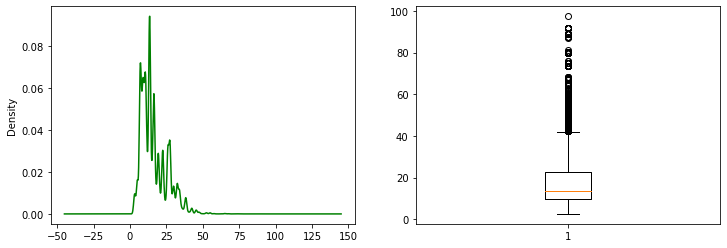

In [19]:
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['price'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(df['price'])
plt.show()

In [20]:
pd.set_option("display.max.row", None)
pd.set_option("display.precision", 2)
df.groupby(['price']).mean()[['month', 'hour', 'day']]

,month,hour,day
price,,,
2.50,11.61,10.87,17.65
3.00,11.59,11.54,17.71
3.50,11.59,11.49,17.81
4.50,11.58,11.89,17.91
5.00,11.58,11.63,17.87
5.50,11.57,11.57,18.00
6.00,11.61,11.63,17.49
6.50,11.59,11.54,17.70
7.00,11.59,11.66,17.79


- From this table, we can see that our *price* as target value has various mean with *month*, *hour*, and *day* variables

Now we want to see what kind of *cab_type* that has more *price*

In [21]:
df[df['cab_type'] == 'Lyft'].groupby(['cab_type', 'name']).mean()[['price']]

price
cab_type name               
Lyft     Lux           17.77
         Lux Black     23.06
         Lux Black XL  32.32
         Lyft           9.61
         Lyft XL       15.31
         Shared         6.03

- From the table above, we can see that ***Lux Black XL*** has more average in ***price***. Such a luxury car i guess

Now let's take a look the connection between ***distance*** and ***price***

In [22]:
df.groupby(['price']).mean()[['distance']]

,distance
price,
2.50,1.25
3.00,1.49
3.50,1.48
4.50,0.60
5.00,1.49
5.50,0.71
6.00,0.74
6.50,1.06
7.00,1.60


From the table, we can see that each price has it own ***distance*** averages, and from the table we can see that the average of ***distance** is about $0.60 - 7.46$

Now let's take a look the ***icon*** column so we can see does the weather impact our ***price***

In [23]:
df.groupby(['icon']).mean()[['price']]

,price
icon,
clear-day,16.27
clear-night,16.24
cloudy,16.29
fog,16.28
partly-cloudy-day,16.33
partly-cloudy-night,16.33
rain,16.29


From that table, we can see that ***icon*** doesn't really impact the price

### **Correlation Check**

First, we want to see the correlation between ***cab_type*** and ***temperature*** features variable

In [24]:
df_new = df[['price','temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]
df_new.head()

,price,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,5.0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,43.68,33.73,38.07
1,11.0,43.58,37.35,47.30,42.10,43.92,36.20,40.49,47.30,36.20,43.92
2,7.0,38.33,32.93,47.55,33.10,44.12,29.11,35.36,47.55,31.04,44.12
3,26.0,34.38,29.63,45.03,28.90,38.53,26.20,34.67,45.03,30.30,38.53
4,9.0,37.44,30.88,42.18,36.71,35.75,30.29,33.10,42.18,29.11,35.75


<AxesSubplot:>

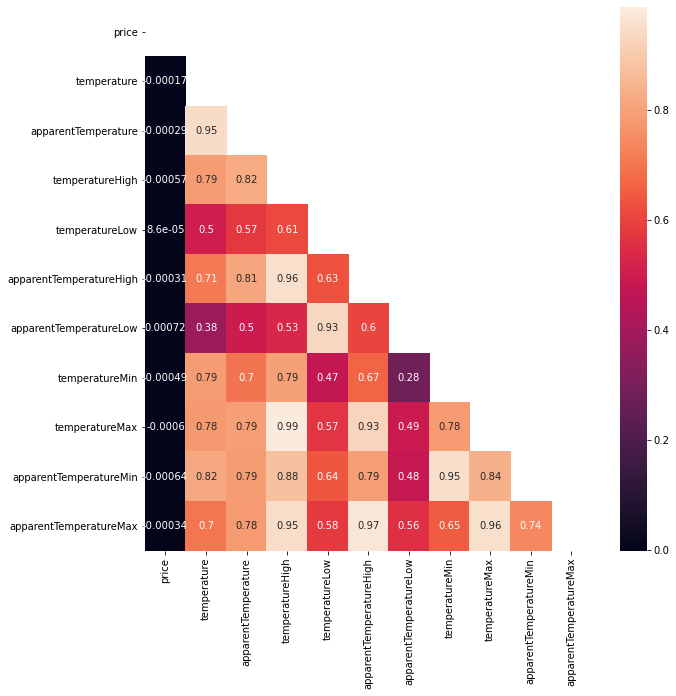

In [25]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(10,10))
sns.heatmap(df_new.corr(),annot=True, mask=np.triu(df_new.corr()))

It seems like we have a really weak correlation between ***price*** and ***temperature*** features variable. So we can drop the ***temperature*** features variable since it doesn't really impact our ***price***

In [26]:
df_new = df[['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureMax','apparentTemperatureMin','apparentTemperatureMax']]

df = df.drop(df_new.columns,axis=1)
print(df.shape)
df.head()

(693071, 26)


,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,0.00,0.0,0.68,8.66,9.17,10.00,partly-cloudy-night,32.70,1021.98,57,0.72,0,303.8,0.30,1.28e-01
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,0.13,1.0,0.94,11.98,11.98,4.79,rain,41.83,1003.97,90,1.00,0,291.1,0.64,1.30e-01
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,0.00,0.0,0.75,7.33,7.33,10.00,clear-night,31.10,992.28,240,0.03,0,315.7,0.68,1.06e-01
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,0.00,0.0,0.73,5.28,5.28,10.00,clear-night,26.64,1013.73,310,0.00,0,291.1,0.75,0.00e+00
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,0.00,0.0,0.70,9.14,9.14,10.00,partly-cloudy-night,28.61,998.36,303,0.44,0,347.7,0.72,1.00e-04


Now let's see the corellation between ***price*** and ***climate*** features variable

In [27]:
df_col = ['price','precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax']
df_new = df[df_col]
df_new.head()

,price,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax
0,5.0,0.00,0.0,0.68,8.66,9.17,10.00,32.70,1021.98,57,0.72,0,303.8,0.30,1.28e-01
1,11.0,0.13,1.0,0.94,11.98,11.98,4.79,41.83,1003.97,90,1.00,0,291.1,0.64,1.30e-01
2,7.0,0.00,0.0,0.75,7.33,7.33,10.00,31.10,992.28,240,0.03,0,315.7,0.68,1.06e-01
3,26.0,0.00,0.0,0.73,5.28,5.28,10.00,26.64,1013.73,310,0.00,0,291.1,0.75,0.00e+00
4,9.0,0.00,0.0,0.70,9.14,9.14,10.00,28.61,998.36,303,0.44,0,347.7,0.72,1.00e-04


<AxesSubplot:>

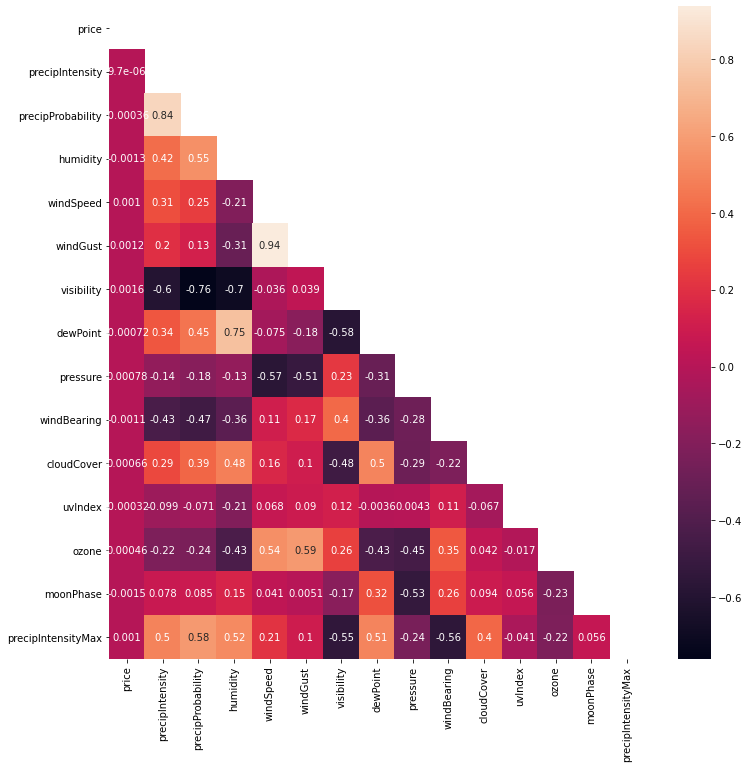

In [28]:
#plotting heatmap with correlation on df_new dataframe
plt.figure(figsize=(12,12))
sns.heatmap(df_new.corr(),annot=True, mask=np.triu(df_new.corr()))

Same as before, the ***climate*** features variable doesn't really impact our ***price*** target variable as well. So we can drop it since it doesnt really impact at all

In [29]:
df_col = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax']
df = df.drop(df_col,axis=1)
print(df.shape)
df.head()

(693071, 12)


,hour,day,month,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,9,16,12,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,2,27,11,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,1,28,11,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,4,30,11,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,3,29,11,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


Next we want to see the correlation between ***price*** and our left ***numerical*** features

In [30]:
num_cols = list(df.select_dtypes("number").drop(columns = ['price']).columns)
df[num_cols].describe().T.apply(lambda s: s.apply(lambda x: format(x, 'g')))

,count,mean,std,min,25%,50%,75%,max
hour,693071,11.6191,6.94811,0,6,12,18,23
day,693071,17.7944,9.98229,1,13,17,28,30
month,693071,11.5867,0.492429,11,11,12,12,12
distance,693071,2.18943,1.13894,0.02,1.28,2.16,2.92,7.86
surge_multiplier,693071,1.01387,0.0916413,1,1,1,1,3


In [31]:
df_num = ['price','hour', 'day', 'month', 'distance',
       'surge_multiplier']
df_new = df[df_num]
df_new.head()

,price,hour,day,month,distance,surge_multiplier
0,5.0,9,16,12,0.44,1.0
1,11.0,2,27,11,0.44,1.0
2,7.0,1,28,11,0.44,1.0
3,26.0,4,30,11,0.44,1.0
4,9.0,3,29,11,0.44,1.0


<AxesSubplot:>

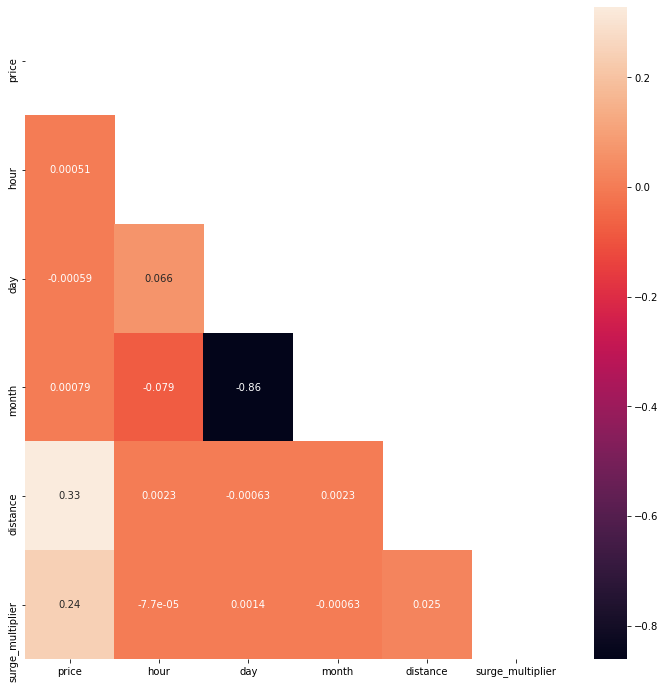

In [32]:
#plotting heatmap with correlation on df_new dataframe
plt.figure(figsize=(12,12))
sns.heatmap(df_new.corr(),annot=True, mask=np.triu(df_new.corr()))

Seems like we have $2$ good correlation with our *target* variables. There is ***distance*** and ***surge_multiplier***, they have a better correlation than our last correlation.

Since *month*, *day*, and *hour* have a weak correlation score. We can drop it

In [33]:
df_col = ['hour', 'day', 'month']
df = df.drop(df_col,axis=1)
print(df.shape)
df.head()

(693071, 9)


,source,destination,cab_type,name,price,distance,surge_multiplier,short_summary,icon
0,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,Mostly Cloudy,partly-cloudy-night
1,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,Rain,rain
2,Haymarket Square,North Station,Lyft,Lyft,7.0,0.44,1.0,Clear,clear-night
3,Haymarket Square,North Station,Lyft,Lux Black XL,26.0,0.44,1.0,Clear,clear-night
4,Haymarket Square,North Station,Lyft,Lyft XL,9.0,0.44,1.0,Partly Cloudy,partly-cloudy-night


Looks like there is only **categorical** features left.

We can encode it with **OneHotEncoder** so we can have another **numerical** features

In [34]:
cat_col = df.select_dtypes(include=['object','category']).columns.tolist()
print(cat_col)

#intiate OneHotEncoder and concatinating original df with encoded column df's
for col in cat_col:
    encoder = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(encoder.fit_transform(df[[col]]).toarray())
    enc_df.columns = encoder.get_feature_names([col])
    df = df.drop(col, axis=1)
    df = pd.concat([df, enc_df], axis=1)

['source', 'destination', 'cab_type', 'name', 'short_summary', 'icon']


In [35]:
df.head()

,price,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


Next, let's see the correlation between ***price*** and ***icon***

In [36]:
df_icon = ['price','icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ', 'icon_ rain ']
df_new = df[df_icon]
df_new.head()

,price,icon_ clear-day,icon_ clear-night,icon_ cloudy,icon_ fog,icon_ partly-cloudy-day,icon_ partly-cloudy-night,icon_ rain
0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

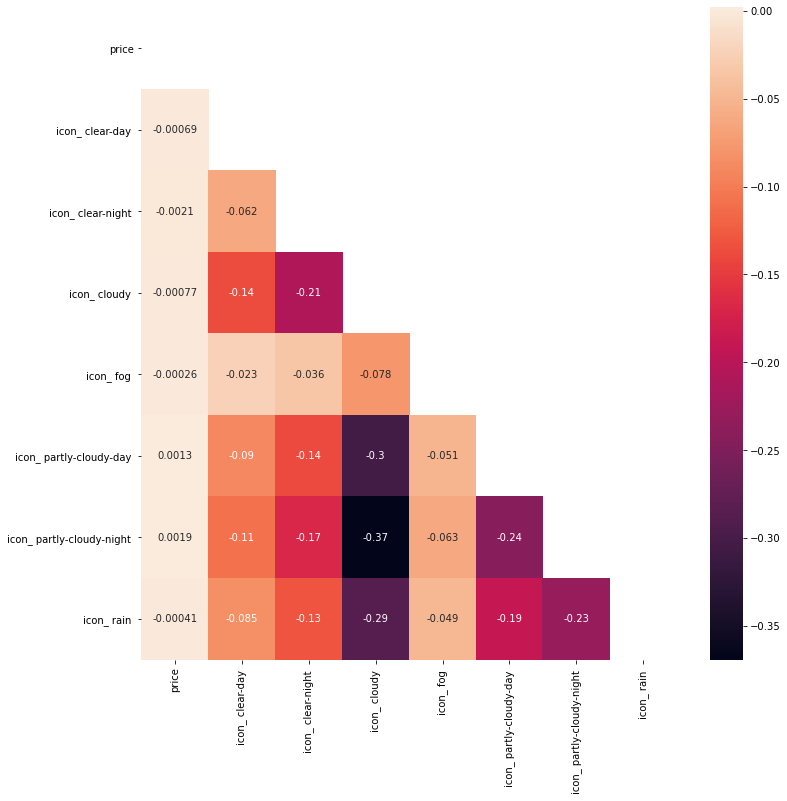

In [37]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(12,12))
sns.heatmap(df_new.corr(),annot=True, mask=np.triu(df_new.corr()))

Since ***icon*** column has a weak correlation score, we can drop it cause it doesn't really impact ***price***

In [38]:
df_col = ['icon_ clear-day ', 'icon_ clear-night ', 'icon_ cloudy ', 'icon_ fog ',
       'icon_ partly-cloudy-day ', 'icon_ partly-cloudy-night ', 'icon_ rain ']
df = df.drop(df_col,axis=1)
print(df.shape)
df.head()

(693071, 51)


,price,distance,surge_multiplier,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,5.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


How about our ***source*** and ***destination*** features. Do they have a correlation with ***price*** ?

Logically, ***source*** and ***destination*** should have correlation with ***price***

Let's check !!

In [39]:
df_dest = ['price','destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay']
df_new = df[df_dest]
df_new.head()

,price,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:>

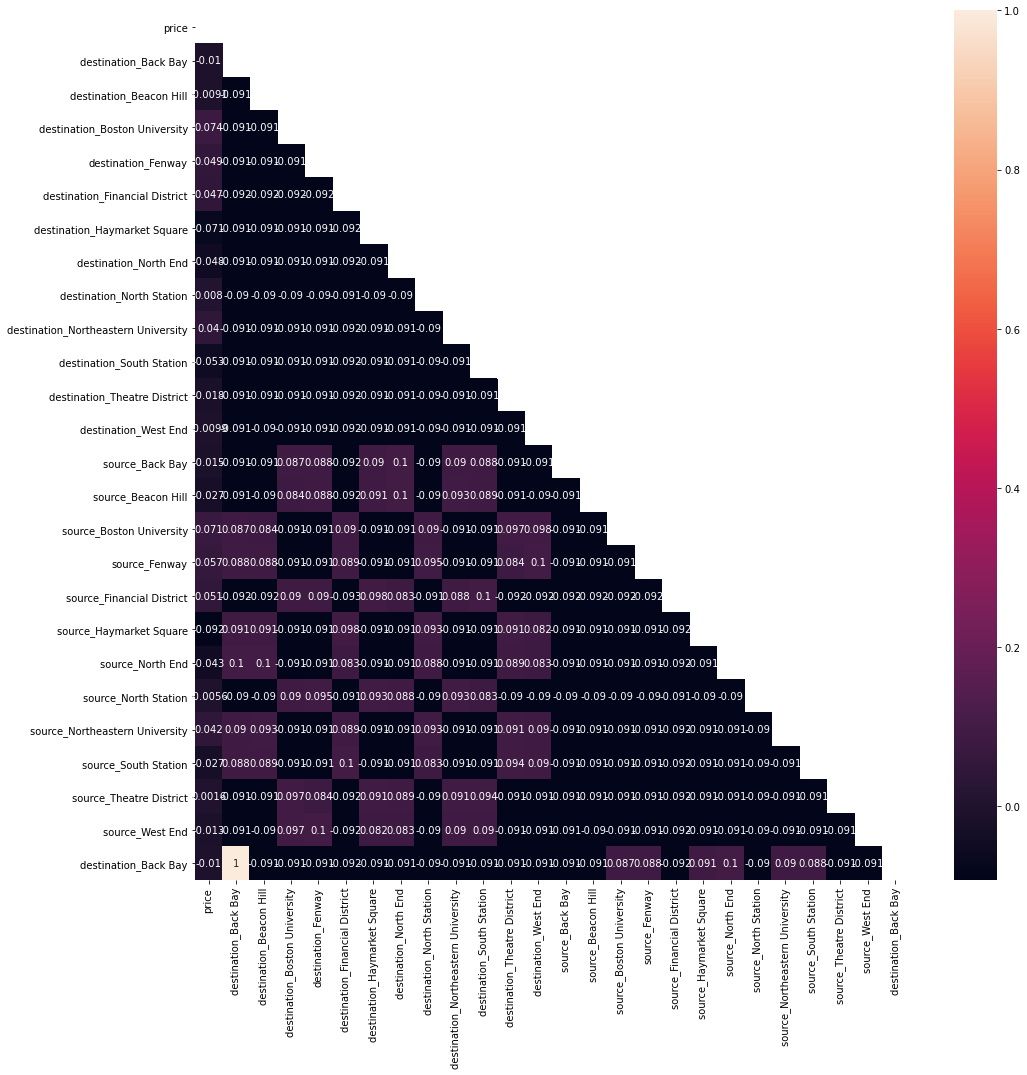

In [40]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(16,16))
sns.heatmap(df_new.corr(),annot=True, mask=np.triu(df_new.corr()))

ALL BLACK !!! It means they have a weak correlation score (near 0)

So we can drop all of that column cause it doesn't really impact the ***price***

In [41]:
df_col = ['destination_Back Bay',
       'destination_Beacon Hill', 'destination_Boston University',
       'destination_Fenway', 'destination_Financial District',
       'destination_Haymarket Square', 'destination_North End',
       'destination_North Station', 'destination_Northeastern University',
       'destination_South Station', 'destination_Theatre District',
       'destination_West End', 'source_Back Bay', 'source_Beacon Hill', 'source_Boston University',
       'source_Fenway', 'source_Financial District', 'source_Haymarket Square',
       'source_North End', 'source_North Station',
       'source_Northeastern University', 'source_South Station',
       'source_Theatre District', 'source_West End', 'destination_Back Bay']
df = df.drop(df_col,axis=1)
print(df.shape)
df.head()

(693071, 27)


,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
0,5.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,7.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Kinda weird, cause we can't find any single correlation between ***price*** and other columns

Let's check another column. Now we want to check ***short_summary*** features

In [42]:
df_ss = ['price','short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
df_new = df[df_ss]
df_new.head()

,price,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain,short_summary_ Clear
0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<AxesSubplot:>

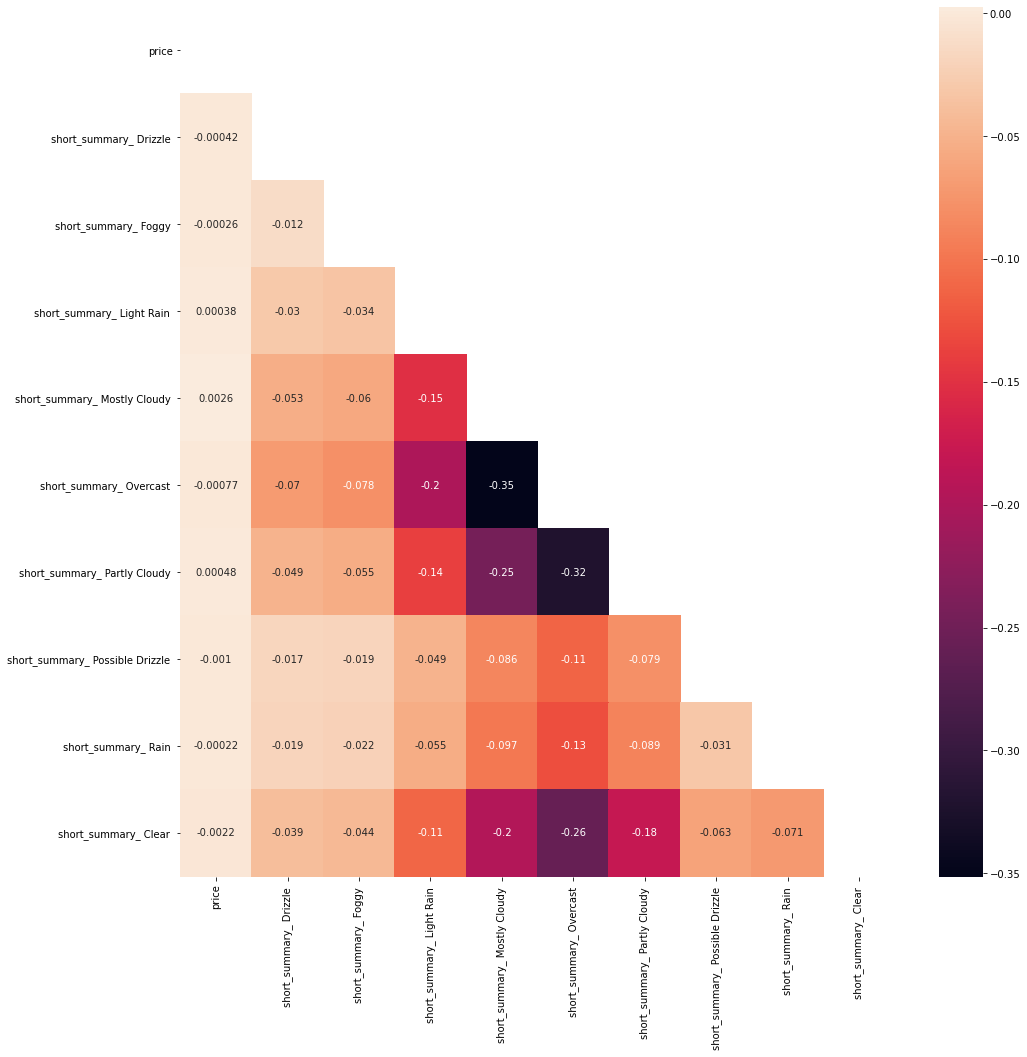

In [43]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(16,16))
sns.heatmap(df_new.corr(),annot=True, mask=np.triu(df_new.corr()))

Again, no correlation with ***price***

Let's drop it

In [44]:
df_col = ['short_summary_ Drizzle ', 'short_summary_ Foggy ',
       'short_summary_ Light Rain ', 'short_summary_ Mostly Cloudy ',
       'short_summary_ Overcast ', 'short_summary_ Partly Cloudy ',
       'short_summary_ Possible Drizzle ', 'short_summary_ Rain ','short_summary_ Clear ']
df = df.drop(df_col,axis=1)
print(df.shape)
df.head()

(693071, 18)


,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Looks like only ***cab_type*** and ***name*** features we have

Let's take a look

In [45]:
df_cabname = ['price','name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV', 'cab_type_Lyft','cab_type_Uber']
df_new = df[df_cabname]
df_new.head()

,price,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,cab_type_Lyft,cab_type_Uber
0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,11.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,26.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,9.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<AxesSubplot:>

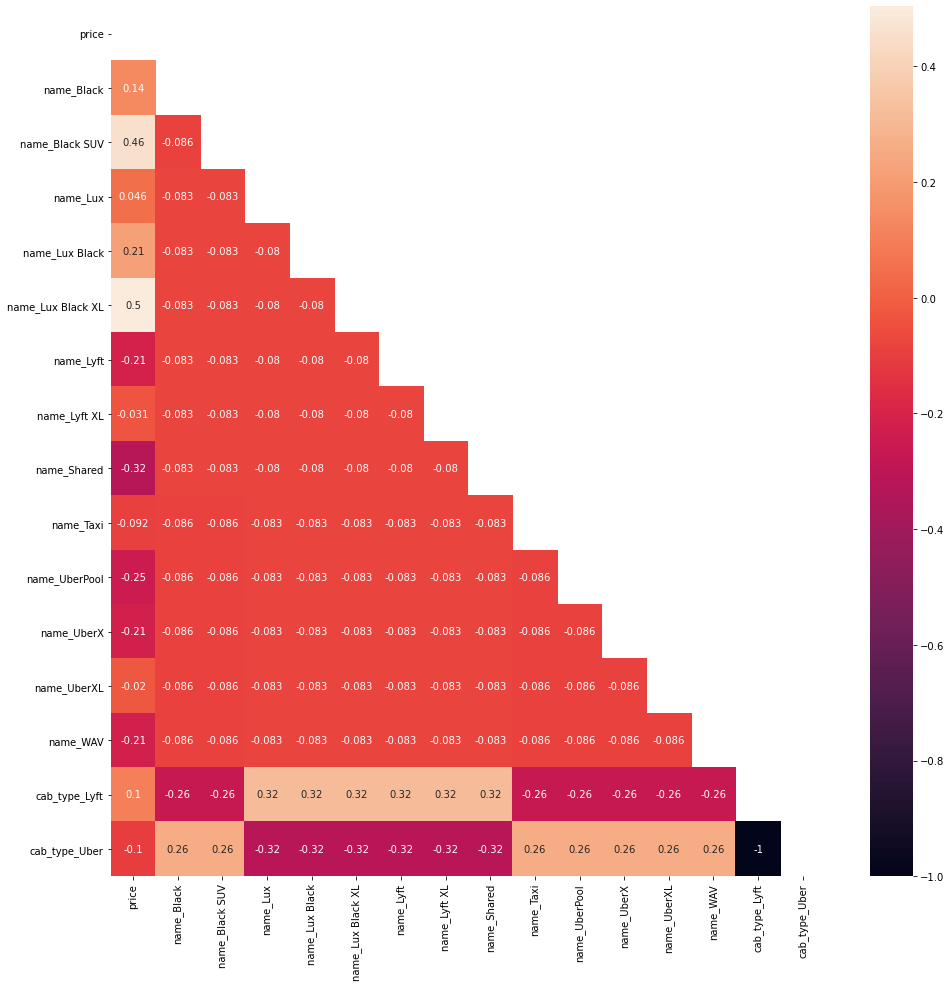

In [46]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(16,16))
sns.heatmap(df_new.corr(),annot=True, mask=np.triu(df_new.corr()))

It looks like there is some ***name*** and ***cab_type*** features that effect our ***price*** column

We should keep that, but for in case lets have a new df variable so we can compare our R$^2$ score in the future

In [61]:
df_col = ['name_Lux', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_Taxi', 'name_UberPool',
       'name_UberX', 'name_UberXL', 'name_WAV', 'cab_type_Uber']
df_new_test = df.drop(df_col,axis=1)
print(df_new_test.shape)
df_new_test.head()

(693071, 8)


,price,distance,surge_multiplier,cab_type_Lyft,name_Black,name_Black SUV,name_Lux Black,name_Lux Black XL
0,5.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,1.0,0.0,0.0,0.0,1.0
4,9.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0


In [47]:
print(df.shape)
df.head()

(693071, 18)


,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Finally, we have only 7 features variable and 1 target variable left

Lets go ahead to **Data Preprocessing**

## **Data Preprocessing**

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   price              693071 non-null  float64
 1   distance           693071 non-null  float64
 2   surge_multiplier   693071 non-null  float64
 3   cab_type_Lyft      693071 non-null  float64
 4   cab_type_Uber      693071 non-null  float64
 5   name_Black         693071 non-null  float64
 6   name_Black SUV     693071 non-null  float64
 7   name_Lux           693071 non-null  float64
 8   name_Lux Black     693071 non-null  float64
 9   name_Lux Black XL  693071 non-null  float64
 10  name_Lyft          693071 non-null  float64
 11  name_Lyft XL       693071 non-null  float64
 12  name_Shared        693071 non-null  float64
 13  name_Taxi          693071 non-null  float64
 14  name_UberPool      693071 non-null  float64
 15  name_UberX         693071 non-null  float64
 16  na

In [49]:
df.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


Since we already change our **categorical** data to **numerical** data, we can go ahead to split our data into **train** and **test** data

But before we go to that part, let's check again our correlation

<AxesSubplot:>

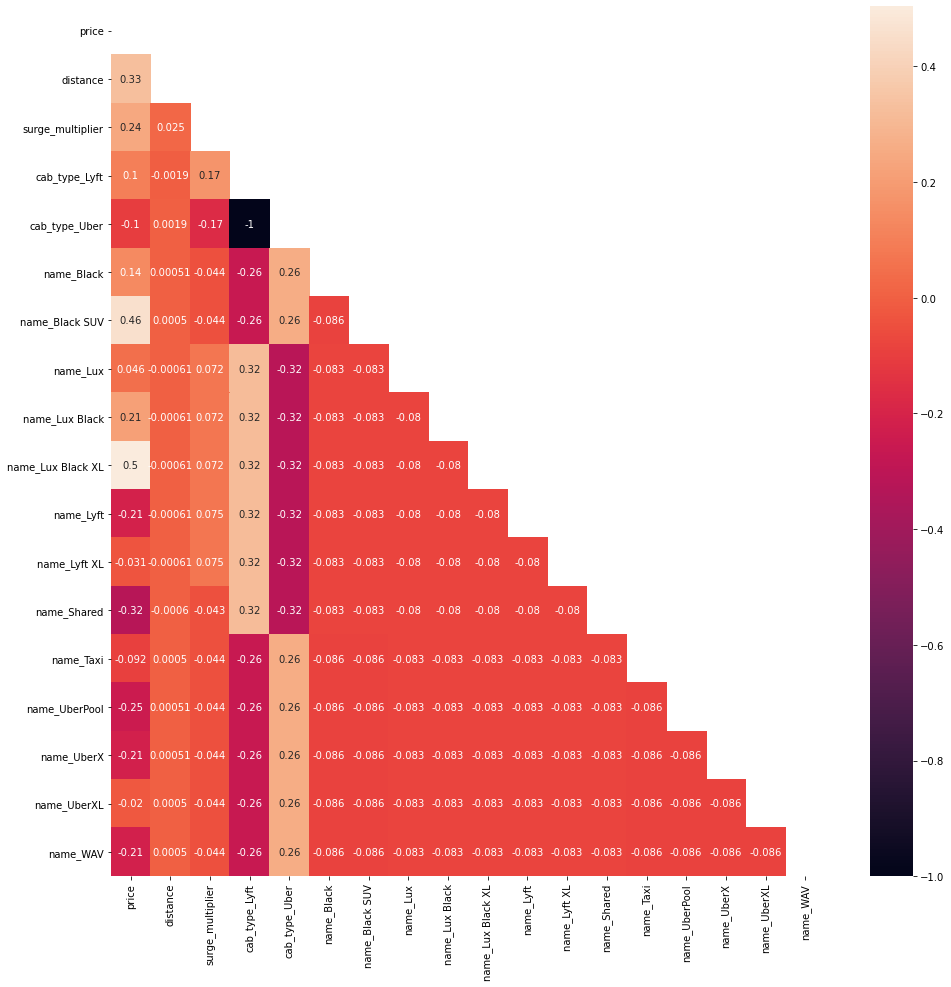

In [50]:
#plotting heatmap with correlation on data_new dataframe
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True, mask=np.triu(df.corr()))

Its a quite good correlation !!

### **Preparing Features Variable and Target Variable**

In [62]:
X = df.drop(columns = ['price'], axis = 1).values
y = df['price'].values
X2 = df_new.drop(columns = ['price'], axis = 1).values
y2 = df_new['price'].values

### **Split Data**

Split into 80% train data, and 20% test data.

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [64]:
print(len(X_train)/len(X), len(X_test)/len(X))
print(len(X2_train)/len(X2), len(X2_test)/len(X2))

0.7999988457171054 0.20000115428289453
0.7999988457171054 0.20000115428289453


## **Define Model**

We want to use LinearRegression as our model

In [70]:
lin_reg = LinearRegression()
lin_reg_2 = LinearRegression()

## **Model Training**

In [71]:
model = lin_reg.fit(X_train,y_train)
model2 = lin_reg_2.fit(X2_train,y2_train)
print(model)
print(model2)

LinearRegression()
LinearRegression()


In [72]:
print(model.coef_)
print(model.intercept_)

[ 2.55586391e+00  1.83575956e+01  1.14876850e+11 -1.14949529e+11
  8.11425382e+10  8.11425382e+10 -1.48683841e+11 -1.48683841e+11
 -1.48683841e+11 -1.48683841e+11 -1.48683841e+11 -1.48683841e+11
  8.11425382e+10  8.11425382e+10  8.11425382e+10  8.11425382e+10
  8.11425382e+10]
33806990370.24817


Next, we want to see our accuracy score from the data

In [73]:
r2 = lin_reg.score(X_test, y_test)
r2_test = lin_reg_2.score(X2_test, y2_test)
print(r2)
print(r2_test)

0.918159082297865
0.7766266371047404


We got 91.82 % for our No-Drop Test data R-Square score and 77.6% for our Dropped Test Data.

Since the No-Drop Test Data has a better score, we use that

In [74]:
#Defining prediction
y_pred = lin_reg.predict(X_test)

## **Model Evaluation**

For evaluate our model, we use MSE, MAE, RMSE, and R$^2$ Score calculation
- **MSE (Mean Squared Error)** : represents the average of the squared difference between the original and predicted values in the data set
- **MAE (Mean Absolute Error)** : represents the average of the absolute difference between the actual and predicted values in the dataset
- **RMSE (Root Mean Squared Error)** : is the square root of Mean Squared error. It measures the standard deviation of residuals
- **R2-S ( R-Square Score)** : is the proportion of the variation in the dependent variable that is predictable from the independent variable(s)

In [59]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rootmeansq = np.sqrt(mse)
print("Mean Squared Error : ",mse)
print("Mean Absolute Error : ",mae)
print("Root Mean Squared Error : ", rootmeansq)
print("R-Squared Score : ", r2)

Mean Squared Error :  6.595980368144205
Mean Absolute Error :  1.8159490551298556
Root Mean Squared Error :  2.5682640767927674
R-Squared Score :  0.918159082297865


From this calculation, we get
- **MSE (Mean Squared Error)** is about 6.59 which is pretty good score ( the score < 10)
- **MAE (Mean Absolute Error)** is about 1.81 which is a good score since it has a small score or close to 1
- **RMSE (Root Mean Squared Error)** is about 2.57 which is a good score since it has a small score
- **R$^2$S ( R-Square Score)** is about 91.8% which is a good score since it has a pretty high score

## **Model Inference**

In this **Model Inference** we will use the same last dataset as our sample, and then we predict our new column called ***predicted_price***

In [60]:
df.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
df_predict = df.copy()
df_predict.head()

,price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,0.44,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
X_new = df_predict.drop(columns=['price'],axis=1).values

In [78]:
y_new = lin_reg.predict(X_new)
y_new

array([ 1.56898499, 12.62208557,  4.42112732, ..., 10.4563446 ,
       27.24111938,  5.71350098])

In [79]:
df_predict.insert(loc=1, column='predicted_price', value=y_new)
df_predict.head()

,price,predicted_price,distance,surge_multiplier,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV
0,5.0,1.57,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,11.0,12.62,0.44,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7.0,4.42,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,26.0,27.18,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9.0,10.15,0.44,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Conclusion**

After using this datasets, we have some following conclusion :
- The datasets have **$693071$ rows** and **$57$ columns**
- This notebook has a purpose to predict ***price*** data with a good correlation score between other columns
- The best correlation score for our target variable which is ***price*** are ***distance***, ***surge_multiplier***, ***cab_type***, and ***name*** columns
- After EDA the datasets change into **$693071$ rows** and **$18$ columns**
- **MSE (Mean Squared Error)** is about 6.59 which is pretty good score ( the score < 10)
- **MAE (Mean Absolute Error)** is about 1.81 which is a good score since it has a small score or close to 1
- **RMSE (Root Mean Squared Error)** is about 2.57 which is a good score since it has a small score
- **R$^2$S ( R-Square Score)** is about 91.8% which is a good score since it has a pretty high score